In [1]:
import pandas as pd
import numpy as np

In [2]:
boots = pd.read_csv('../inputCSVs/boots.csv')

In [3]:
boots.shape

(77493, 4)

In [4]:
# Check the missing values in df
null_values=boots.isna().sum()


In [5]:
null_values

Unnamed: 0    0
product_Id    0
rating        0
reviews       0
dtype: int64

In [6]:
boots.shape

(77493, 4)

In [7]:
# !pip3 install gensim
# !pip3 install pyldavis
# !pip3 install nltk
# !pip3 install matplotlib
# !pip3 install seaborn
# !pip3 install textblob
# !pip3 install spacy
# !python3 -m spacy download en 

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [8]:
import nltk
from nltk import FreqDist
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samridhi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
pd.set_option("display.max_colwidth", 200)
import re
import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
%matplotlib inline

In [10]:
# a function that provides the most frequent words with count on a plot
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  print(d)
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

In [11]:
boots['reviews']

0        I really wanted to like these shoes , and bought them in my favorite color .I own other Timberland shoes that I love , but these are a disappointment .I do not like them at all , and I am returnin...
1        The seller sent me the wrong tracking # to my package .When i finally did receive my boots , they did not come in the correct box .I was giving these as a gift and the box was all scratched up .Al...
2        I ordered from the company .I received an email stating they did not have this item in the size I requested .Then I ordered in another size .The was a little more than a week before Christmas .We ...
3                                                             They look great on my feet I bought wide but there stil tight need to break in . nice color . it took a while to get them that ok am enjoying them
4        These boots look just like the picture-and I like the quality .I do think they run a tad big .But I ordered the 6?1/2 - and they were too small .I have nar

      word   count
42     the  240664
7        ,  207616
0        I  197290
8      and  190829
23       a  166411
3       to  128065
10    them   94416
15      .I   93702
101  boots   90520
102   they   89733
22     are   87546
87       .   83681
11      in   81160
37      of   79161
169    for   72866
33      is   70496
5    these   65810
12      my   65675
21     but   64587
133   have   60059
62      on   56681
19    that   53890
61    with   51972
135   size   48634
51      it   48064
52     was   46994
227     so   43150
26     not   42962
83     n't   41036
230   boot   39621


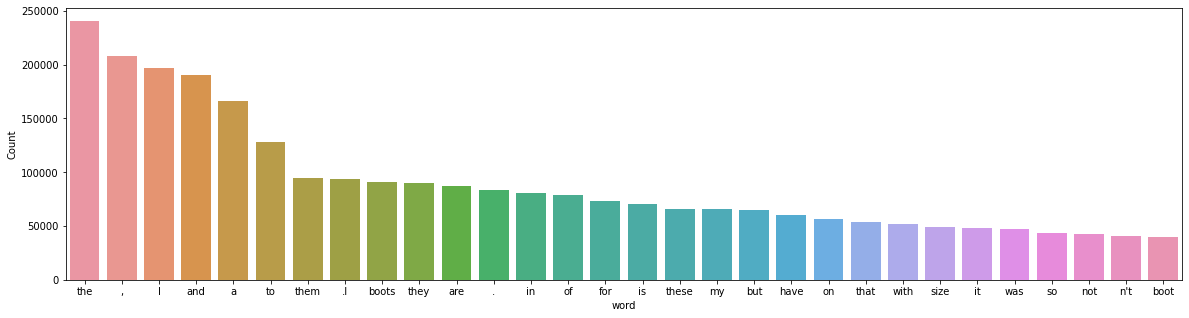

In [12]:
freq_words(boots['reviews'])

In [13]:
# replace "n't" with " not"
boots['reviews']= boots['reviews'].str.replace("n\'t", " not")

# remove unwanted characters, numbers and symbols
boots['reviews'] = boots['reviews'].str.replace("[^a-zA-Z#]", " ")

/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1906/2402708023.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  boots['reviews'] = boots['reviews'].str.replace("[^a-zA-Z#]", " ")


In [14]:
boots['reviews']

0        I really wanted to like these shoes   and bought them in my favorite color  I own other Timberland shoes that I love   but these are a disappointment  I do not like them at all   and I am returnin...
1        The seller sent me the wrong tracking # to my package  When i finally did receive my boots   they did not come in the correct box  I was giving these as a gift and the box was all scratched up  Al...
2        I ordered from the company  I received an email stating they did not have this item in the size I requested  Then I ordered in another size  The was a little more than a week before Christmas  We ...
3                                                             They look great on my feet I bought wide but there stil tight need to break in   nice color   it took a while to get them that ok am enjoying them
4        These boots look just like the picture and I like the quality  I do think they run a tad big  But I ordered the         and they were too small  I have nar

      word   count
0        I  304147
40     the  240873
7      and  191076
21       a  166546
3       to  128447
9     them   94454
95   boots   90893
96    they   89809
20     are   87557
24     not   84094
10      in   81839
35      of   79226
163    for   72889
31      is   70506
5    these   65845
11      my   65704
19     but   64620
127   have   60083
59      on   57191
17    that   53903
58    with   51987
129   size   49183
48      it   48097
49     was   47000
213     so   43290
81    They   40494
29     The   40374
216   boot   39923
227   wear   38787
106    fit   35130


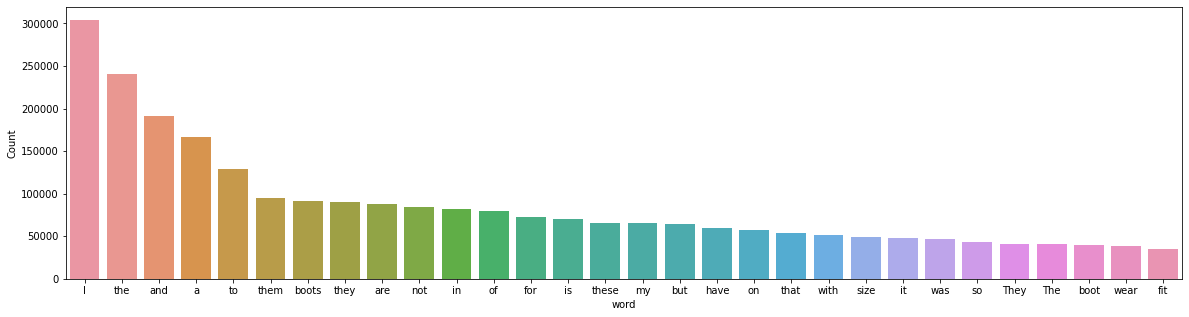

In [15]:
freq_words(boots['reviews'])

#### Checking stopwords in the reviews

In [16]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [17]:
# Checking the number of stopwords in each review
boots['stopwords'] = boots['reviews'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
boots[['reviews','stopwords']].head()

,reviews,stopwords
0,I really wanted to like these shoes and bought them in my favorite color I own other Timberland shoes that I love but these are a disappointment I do not like them at all and I am returnin...,66
1,The seller sent me the wrong tracking # to my package When i finally did receive my boots they did not come in the correct box I was giving these as a gift and the box was all scratched up Al...,41
2,I ordered from the company I received an email stating they did not have this item in the size I requested Then I ordered in another size The was a little more than a week before Christmas We ...,73
3,They look great on my feet I bought wide but there stil tight need to break in nice color it took a while to get them that ok am enjoying them,14
4,These boots look just like the picture and I like the quality I do think they run a tad big But I ordered the and they were too small I have narrow feet though Anyway is my normal ...,74


In [18]:
# function to remove stopwords
def remove_stopwords(rev):
  rev_new = " ".join([i for i in rev if i not in stop_words])
  return rev_new

In [19]:
boots['reviews']

0        I really wanted to like these shoes   and bought them in my favorite color  I own other Timberland shoes that I love   but these are a disappointment  I do not like them at all   and I am returnin...
1        The seller sent me the wrong tracking # to my package  When i finally did receive my boots   they did not come in the correct box  I was giving these as a gift and the box was all scratched up  Al...
2        I ordered from the company  I received an email stating they did not have this item in the size I requested  Then I ordered in another size  The was a little more than a week before Christmas  We ...
3                                                             They look great on my feet I bought wide but there stil tight need to break in   nice color   it took a while to get them that ok am enjoying them
4        These boots look just like the picture and I like the quality  I do think they run a tad big  But I ordered the         and they were too small  I have nar

#### Checking punctuation present in the reviews

In [20]:
import string
nltk.download('punkt')
def count_punctuation(text):
    count = sum([1 for char in text if char in string.punctuation])
    return count

boots['punctuation'] = boots['reviews'].apply(lambda x: count_punctuation(x))


[nltk_data] Downloading package punkt to /Users/samridhi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
boots[['reviews','punctuation']]

,reviews,punctuation
0,I really wanted to like these shoes and bought them in my favorite color I own other Timberland shoes that I love but these are a disappointment I do not like them at all and I am returnin...,0
1,The seller sent me the wrong tracking # to my package When i finally did receive my boots they did not come in the correct box I was giving these as a gift and the box was all scratched up Al...,1
2,I ordered from the company I received an email stating they did not have this item in the size I requested Then I ordered in another size The was a little more than a week before Christmas We ...,0
3,They look great on my feet I bought wide but there stil tight need to break in nice color it took a while to get them that ok am enjoying them,0
4,These boots look just like the picture and I like the quality I do think they run a tad big But I ordered the and they were too small I have narrow feet though Anyway is my normal ...,0
...,...,...
77488,These shoes come size large or at least mine did And that was strange bc I have many pairs from this designer Plus I ve never experienced receiving them dirty lOOking and cheap qualit...,0
77489,Wonderful fit very nice look but the shoe stinks It has a terrible chemical odor So strong that when I left the shoes out in the room to # air # the whole room smelled I was getti...,2
77490,I wore these shoes for the first time today I have a desk job so I do not walk a lot throughout the day and I wore them with socks but they were rubbing on the heel of both feet Halfway throu...,0
77491,As pink is apparently the color for Spring these shoes are perfect Cute and comfortable especially if you stand all day I got several compliments the first day I wore them The best part is ...,0


#### Checking hastags present in the review text

In [22]:
boots['hastags'] = boots['reviews'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
boots['hastags'].sum()

9647

In [23]:
boots.hastags.loc[boots.hastags != 0].count()

4474

#### Checking numerics from the reviews

In [24]:
boots['numerics'] = boots['reviews'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
boots['numerics'].sum()

0

#### Checking the words which are in uppercase, which may be significant

In [25]:
boots['upper'] = boots['reviews'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
boots['reviews'][boots['upper'] > 1].count()

63037

In [26]:
boots['reviews']

0        I really wanted to like these shoes   and bought them in my favorite color  I own other Timberland shoes that I love   but these are a disappointment  I do not like them at all   and I am returnin...
1        The seller sent me the wrong tracking # to my package  When i finally did receive my boots   they did not come in the correct box  I was giving these as a gift and the box was all scratched up  Al...
2        I ordered from the company  I received an email stating they did not have this item in the size I requested  Then I ordered in another size  The was a little more than a week before Christmas  We ...
3                                                             They look great on my feet I bought wide but there stil tight need to break in   nice color   it took a while to get them that ok am enjoying them
4        These boots look just like the picture and I like the quality  I do think they run a tad big  But I ordered the         and they were too small  I have nar

#### Cleaning steps

In [27]:


# remove short words whose (length < 3)
boots['reviews'] = boots['reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# removing puctuations
boots['reviews'] = boots['reviews'].str.replace('[^\w\s]','')
boots['reviews'].head()

# make entire review text lowercase
reviews = [r.lower() for r in boots['reviews']]

# remove stopwords from the reviews
reviews = [remove_stopwords(r.split()) for r in reviews]




<>:5: DeprecationWarning: invalid escape sequence \w
<>:5: DeprecationWarning: invalid escape sequence \w
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1906/1601111777.py:5: DeprecationWarning: invalid escape sequence \w
  boots['reviews'] = boots['reviews'].str.replace('[^\w\s]','')
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1906/1601111777.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  boots['reviews'] = boots['reviews'].str.replace('[^\w\s]','')


In [28]:
boots['reviews']

0        really wanted like these shoes and bought them favorite color own other Timberland shoes that love but these are disappointment not like them all and returning them The leather dry feeling instead...
1        The seller sent the wrong tracking package When finally did receive boots they did not come the correct box was giving these gift and the box was all scratched Also the boots were large fit the bo...
2        ordered from the company received email stating they did not have this item the size requested Then ordered another size The was little more than week before Christmas sent several emails you with...
3                                                                                             They look great feet bought wide but there stil tight need break nice color took while get them that enjoying them
4        These boots look just like the picture and like the quality think they run tad big But ordered the and they were too small have narrow feet though Anyway n

            word  count
52         boots  92731
77          size  50040
136         boot  40861
145         wear  39059
60           fit  36076
2           like  27351
44   comfortable  27039
255        would  26576
114        great  25744
8           love  24916
192          rrb  23398
113         look  22626
258          lrb  21380
277         pair  20979
115         feet  20674
86           get  18476
71       ordered  17809
0         really  17199
80        little  17054
3          shoes  16162
38          well  15250
167         good  15032
11       leather  14129
156         foot  13569
946         warm  13196
137        socks  13110
188          got  13003
4         bought  12956
382         time  12339
6          color  12271
58          also  12065
62          even  11843
334      perfect  11720
173          bit  11658
32          shoe  11611


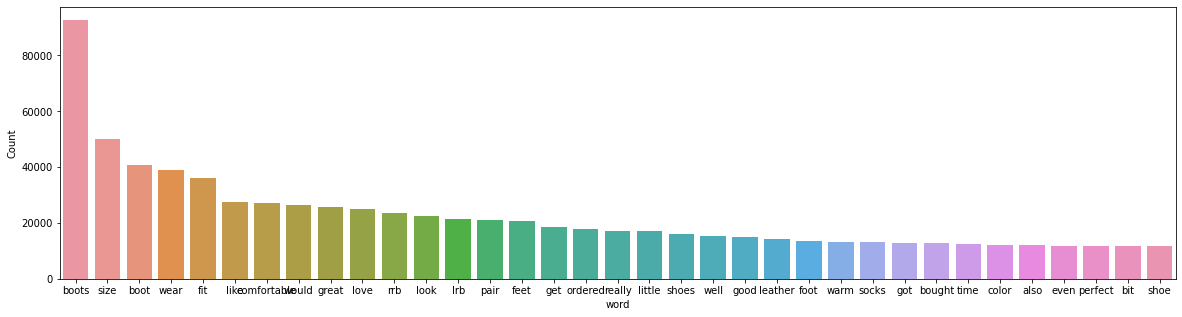

In [29]:
freq_words(reviews, 35)

In [30]:
# !pip3 install -U spacy
# !python3 -m spacy download en 
import spacy
# en_core_web_sm

In [31]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])


In [32]:
import pandas as pd
stemmer = SnowballStemmer("english")
# reviews_3 = [stemmer.stem(plural) for plural in original_words]

def stemming_and_lemmatization(texts, tags=['NOUN', 'ADJ']):
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [33]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['seller', 'sent', 'wrong', 'tracking', 'package', 'finally', 'receive', 'boots', 'come', 'correct', 'box', 'giving', 'gift', 'box', 'scratched', 'also', 'boots', 'large', 'fit', 'box', 'gave', 'even', 'know', 'wrap', 'boots', 'also', 'several', 'scuff', 'marks', 'already', 'displeased', 'waste', 'money']


In [34]:
print(tokenized_reviews[1])
len(tokenized_reviews[1])

['seller', 'sent', 'wrong', 'tracking', 'package', 'finally', 'receive', 'boots', 'come', 'correct', 'box', 'giving', 'gift', 'box', 'scratched', 'also', 'boots', 'large', 'fit', 'box', 'gave', 'even', 'know', 'wrap', 'boots', 'also', 'several', 'scuff', 'marks', 'already', 'displeased', 'waste', 'money']


33

In [35]:
reviews_2 = stemming_and_lemmatization(tokenized_reviews)
print(reviews_2[1])

['seller', 'wrong', 'tracking', 'package', 'boot', 'correct', 'box', 'gift', 'box', 'large', 'fit', 'box', 'wrap', 'boot', 'several', 'scuff', 'mark', 'waste', 'money']


In [36]:
set(tokenized_reviews[1]) - set(reviews_2[1])

{'already',
 'also',
 'boots',
 'come',
 'displeased',
 'even',
 'finally',
 'gave',
 'giving',
 'know',
 'marks',
 'receive',
 'scratched',
 'sent'}

In [37]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))
    
boots['reviews'] = reviews_3

            word   count
26          boot  132612
41          size   50615
59          foot   33583
31           fit   29147
0           shoe   26970
21   comfortable   26936
58         great   24498
150         pair   20405
118         love   19483
228         calf   18364
91          good   17024
42        little   15405
212         time   14801
71          sock   14580
67           big   13828
68         small   13656
5        leather   13541
541         warm   13493
2          color   13459
49           day   13335
112         wear   11429
143         heel   11297
65       quality   11023
100        price   10823
187      perfect   10660
95           bit   10653
104          rrb   10620
63          nice   10341
30         large    9600
60          wide    9585
267       review    9076
139          toe    9001
123         true    8440
10         ankle    8311
149         jean    8200


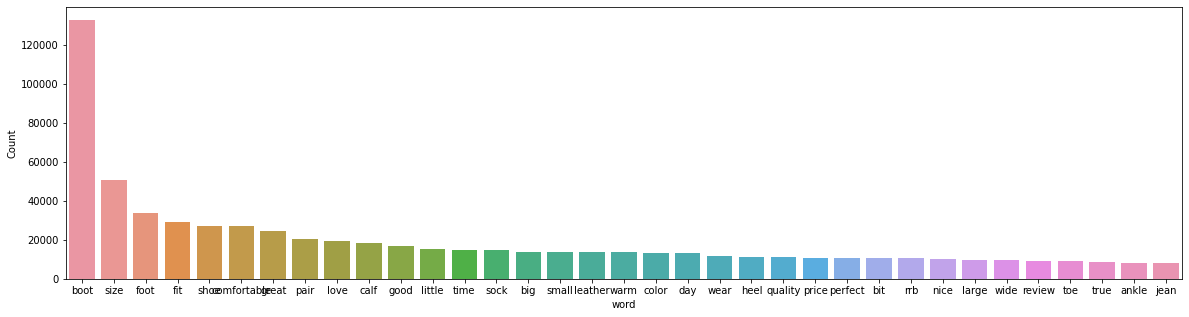

In [38]:
freq_words(boots['reviews'], 35)

#### Removing any URLs in the reviews

In [39]:
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)



# remove all urls from df
import re
import string

boots['reviews'] = boots['reviews'].apply(lambda x: remove_url(x))

#### Removing html tags from the text

In [40]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)



# remove all html tags from df
boots['reviews'] = boots['reviews'].apply(lambda x: remove_html(x))

#### Removing emojis and emoticons

In [41]:
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)



# remove all emojis from df
boots['reviews'] = boots['reviews'].apply(lambda x: remove_emoji(x))

In [42]:
!pip3 install emot
import emot
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO

# Function for removing emoticons
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'\(' + u'\|'.join(k for k in EMOTICONS_EMO) + u'\)')
    return emoticon_pattern.sub(r'', text)



# boots['reviews'] = boots['reviews'].apply(lambda x: remove_emoticons(x))

<>:7: DeprecationWarning: invalid escape sequence \(
<>:7: DeprecationWarning: invalid escape sequence \|
<>:7: DeprecationWarning: invalid escape sequence \)
<>:7: DeprecationWarning: invalid escape sequence \(
<>:7: DeprecationWarning: invalid escape sequence \|
<>:7: DeprecationWarning: invalid escape sequence \)
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1906/710773826.py:7: DeprecationWarning: invalid escape sequence \(
  emoticon_pattern = re.compile(u'\(' + u'\|'.join(k for k in EMOTICONS_EMO) + u'\)')
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1906/710773826.py:7: DeprecationWarning: invalid escape sequence \|
  emoticon_pattern = re.compile(u'\(' + u'\|'.join(k for k in EMOTICONS_EMO) + u'\)')
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1906/710773826.py:7: DeprecationWarning: invalid escape sequence \)
  emoticon_pattern = re.compile(u'\(' + u'\|'.join(k for k in EMOTICONS_EMO) + u'\)')


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [43]:
# correction of the words spelling - not done at it is taking  lot of time to run
# from textblob import TextBlob
# boots['reviews'].apply(lambda x: str(TextBlob(x).correct()))

            word   count
26          boot  132612
41          size   50615
59          foot   33583
31           fit   29147
0           shoe   26970
21   comfortable   26936
58         great   24498
150         pair   20405
118         love   19483
228         calf   18364
91          good   17024
42        little   15405
212         time   14801
71          sock   14580
67           big   13828
68         small   13656
5        leather   13541
541         warm   13493
2          color   13459
49           day   13335
112         wear   11429
143         heel   11297
65       quality   11023
100        price   10823
187      perfect   10660
95           bit   10653
104          rrb   10620
63          nice   10341
30         large    9600
60          wide    9585


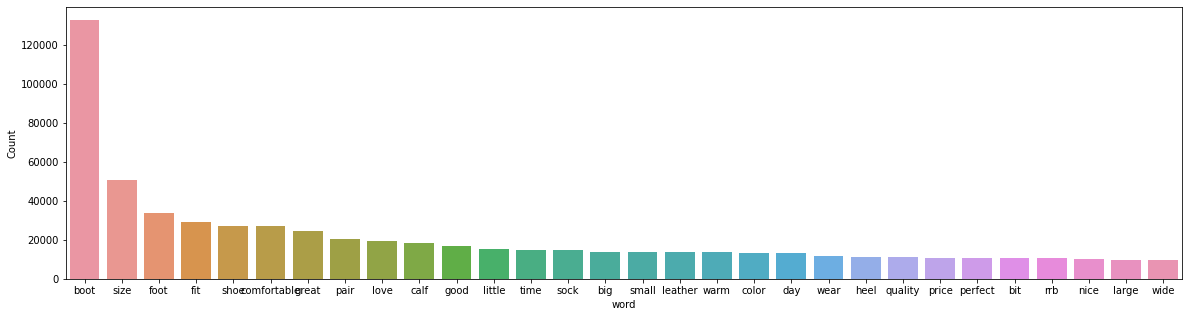

In [44]:
freq_words(boots['reviews'])

In [45]:
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

<>:4: DeprecationWarning: invalid escape sequence \[
<>:6: DeprecationWarning: invalid escape sequence \w
<>:4: DeprecationWarning: invalid escape sequence \[
<>:6: DeprecationWarning: invalid escape sequence \w
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1906/2170350517.py:4: DeprecationWarning: invalid escape sequence \[
  text = re.sub('\[.*?\]', '', text)
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1906/2170350517.py:6: DeprecationWarning: invalid escape sequence \w
  text = re.sub('\w*\d\w*', '', text)


In [46]:


boots['reviews'] = boots['reviews'].apply(round1)
boots['reviews']



0                        shoe favorite color timberland shoe disappointment leather dry supple tongue top ankle long leather rough order shoe top hole tongue bottom shoe clunky sole loose easy fix comfortable
1                                                                                                 seller wrong tracking package boot correct box gift box large fit box wrap boot several scuff mark waste money
2                company email item size size little week several email response chance update merchandise product order day daughter thing boot way inventory thank amazon work company business thank daughter
3                                                                                                                                                                          great foot wide tight need nice color
4        boot picture quality tad big small narrow foot normal size normal boot sock boot vacation mountain cooler weather walk dog nice change sneak wrong avia yea

            word   count
26          boot  132612
41          size   50615
59          foot   33583
31           fit   29147
0           shoe   26970
21   comfortable   26936
58         great   24498
150         pair   20405
118         love   19483
228         calf   18364
91          good   17024
42        little   15405
212         time   14801
71          sock   14580
67           big   13828
68         small   13656
5        leather   13541
541         warm   13493
2          color   13459
49           day   13335
112         wear   11429
143         heel   11297
65       quality   11023
100        price   10823
187      perfect   10660
95           bit   10653
104          rrb   10620
63          nice   10341
30         large    9600
60          wide    9585


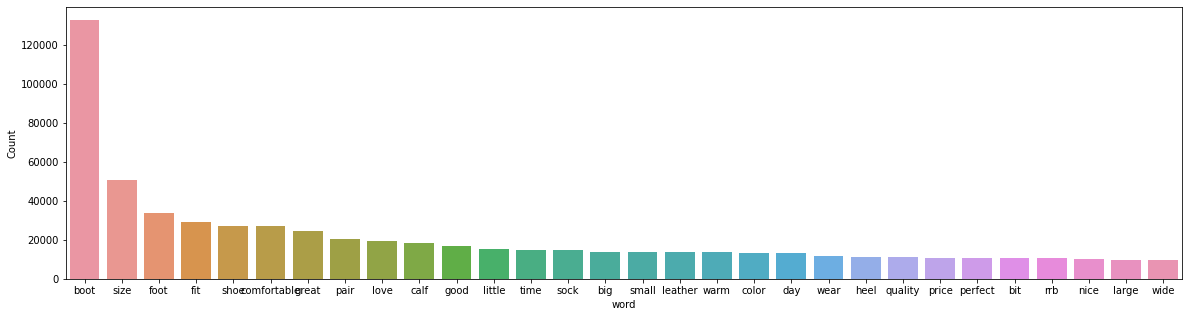

In [47]:
freq_words(boots['reviews'])

In [48]:


# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)



In [49]:


boots['reviews'] = boots['reviews'].apply(round2)
boots['reviews']



0                        shoe favorite color timberland shoe disappointment leather dry supple tongue top ankle long leather rough order shoe top hole tongue bottom shoe clunky sole loose easy fix comfortable
1                                                                                                 seller wrong tracking package boot correct box gift box large fit box wrap boot several scuff mark waste money
2                company email item size size little week several email response chance update merchandise product order day daughter thing boot way inventory thank amazon work company business thank daughter
3                                                                                                                                                                          great foot wide tight need nice color
4        boot picture quality tad big small narrow foot normal size normal boot sock boot vacation mountain cooler weather walk dog nice change sneak wrong avia yea

In [50]:
boots['word_count'] = boots['reviews'].apply(lambda x: len(str(x).split(" ")))
boots[['reviews','word_count']].head()

,reviews,word_count
0,shoe favorite color timberland shoe disappointment leather dry supple tongue top ankle long leather rough order shoe top hole tongue bottom shoe clunky sole loose easy fix comfortable,28
1,seller wrong tracking package boot correct box gift box large fit box wrap boot several scuff mark waste money,19
2,company email item size size little week several email response chance update merchandise product order day daughter thing boot way inventory thank amazon work company business thank daughter,28
3,great foot wide tight need nice color,7
4,boot picture quality tad big small narrow foot normal size normal boot sock boot vacation mountain cooler weather walk dog nice change sneak wrong avia year ready switch clothing foot boot quality...,40


            word   count
26          boot  132612
41          size   50615
59          foot   33583
31           fit   29147
0           shoe   26970
21   comfortable   26936
58         great   24498
150         pair   20405
118         love   19483
228         calf   18364
91          good   17024
42        little   15405
212         time   14801
71          sock   14580
67           big   13828
68         small   13656
5        leather   13541
541         warm   13493
2          color   13459
49           day   13335
112         wear   11429
143         heel   11297
65       quality   11023
100        price   10823
187      perfect   10660
95           bit   10653
104          rrb   10620
63          nice   10341
30         large    9600
60          wide    9585


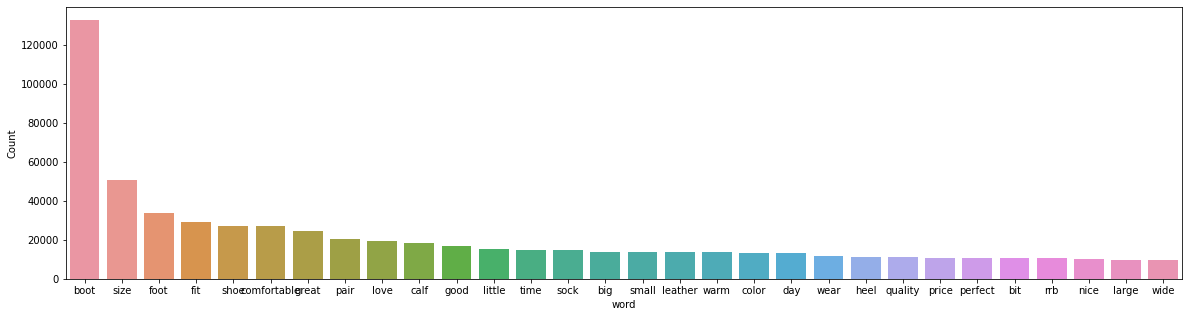

In [51]:
freq_words(boots['reviews'])

In [52]:
boots.to_csv('boots_processed.csv')

In [53]:
boots

,Unnamed: 0,product_Id,rating,reviews,stopwords,punctuation,hastags,numerics,upper,word_count
0,0,B0000DFAXV-0000,0,shoe favorite color timberland shoe disappointment leather dry supple tongue top ankle long leather rough order shoe top hole tongue bottom shoe clunky sole loose easy fix comfortable,66,0,0,0,8,28
1,1,B0000DFAXV-0001,0,seller wrong tracking package boot correct box gift box large fit box wrap boot several scuff mark waste money,41,1,1,0,2,19
2,2,B0000DFAXV-0002,0,company email item size size little week several email response chance update merchandise product order day daughter thing boot way inventory thank amazon work company business thank daughter,73,0,0,0,5,28
3,3,B0000DFAXV-0003,3,great foot wide tight need nice color,14,0,0,0,1,7
4,4,B0000DFAXV-0004,3,boot picture quality tad big small narrow foot normal size normal boot sock boot vacation mountain cooler weather walk dog nice change sneak wrong avia year ready switch clothing foot boot quality...,74,0,0,0,13,40
...,...,...,...,...,...,...,...,...,...,...
77488,77488,B00HD65LD0-0000,1,shoe size large least mine strange many pair designer dirty cheap quality excited take box yellow dirty blond thing leather leather forty cheap blue pair yucky yellow collection,35,0,0,0,4,28
77489,77489,B00HD65LD0-0001,2,wonderful fit nice look shoe terrible chemical odor strong left shoe room air whole room headache room bad cute comfortable company well glue,29,2,2,0,2,23
77490,77490,B00HD65LD0-0002,3,shoe first time today desk job walk lot day sock heel foot day band aid foot blister fine broken advice super cute plan period love poetic licence shoe pair consistent easy,50,0,0,0,10,31
77491,77491,B00HD65LD0-0003,4,pink color spring shoe cute comfortable day several compliment first day good part bow ribbon nice bow,25,0,0,0,2,17


In [54]:
!pip3 install -q wordcloud
import wordcloud

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [55]:
text_for_cloud = " ".join(word for word in boots.reviews)
print ("There are {} words in the combination of all reviews.".format(len(text_for_cloud)))

There are 10321046 words in the combination of all reviews.


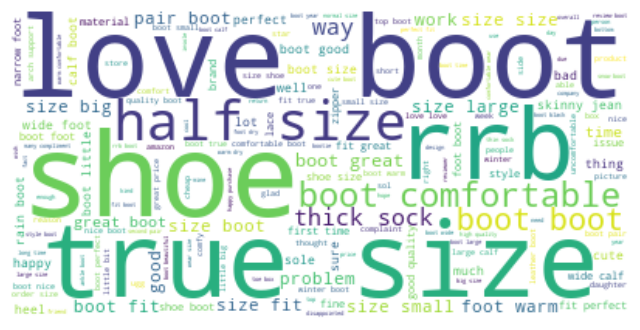

In [56]:
from matplotlib.pyplot import figure

# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_for_cloud)

# Display the generated image:
# the matplotlib way:
figure(figsize= (8,8), dpi= 100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [57]:
freq_of_words = pd.Series(' '.join(boots['reviews']).split()).value_counts()[:40]
freq_of_words

boot           132612
size            50615
foot            33583
fit             29147
shoe            26970
comfortable     26936
great           24498
pair            20405
love            19483
calf            18364
good            17024
little          15405
time            14801
sock            14580
big             13828
small           13656
leather         13541
warm            13493
color           13459
day             13335
wear            11429
heel            11297
quality         11023
price           10823
perfect         10660
bit             10653
rrb             10620
nice            10341
large            9600
wide             9585
review           9076
toe              9001
true             8440
ankle            8311
jean             8200
tight            7785
black            7760
winter           7693
cute             7619
thick            7463
dtype: int64